In [251]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Pandas = Panel Data
Pandas documentation: https://pandas.pydata.org/pandas-docs/version/0.17.0/10min.html

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

In [253]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### DataFrame

In [254]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [255]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-2.068229,0.529982,-0.480845,-0.873935
2013-01-02,-0.196609,-1.789622,4.012847,-0.135283
2013-01-03,-1.496375,-0.640882,0.052315,0.676844
2013-01-04,-0.504513,0.194931,-0.421864,0.314577
2013-01-05,1.017148,0.775655,-0.034056,0.750491
2013-01-06,-0.141120,-1.435189,0.544261,-0.389662


### Creating a DataFrame by passing a dict of objects

In [256]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# Viewing data

In [257]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [258]:
df.head()

,A,B,C,D
2013-01-01,-2.068229,0.529982,-0.480845,-0.873935
2013-01-02,-0.196609,-1.789622,4.012847,-0.135283
2013-01-03,-1.496375,-0.640882,0.052315,0.676844
2013-01-04,-0.504513,0.194931,-0.421864,0.314577
2013-01-05,1.017148,0.775655,-0.034056,0.750491


In [259]:
df.tail(2)

,A,B,C,D
2013-01-05,1.017148,0.775655,-0.034056,0.750491
2013-01-06,-0.141120,-1.435189,0.544261,-0.389662


In [260]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.564950,-0.394188,0.612110,0.057172
std,1.090816,1.064092,1.706703,0.637903
min,-2.068229,-1.789622,-0.480845,-0.873935
25%,-1.248409,-1.236612,-0.324912,-0.326067
50%,-0.350561,-0.222975,0.009129,0.089647
75%,-0.154992,0.446219,0.421274,0.586277
max,1.017148,0.775655,4.012847,0.750491


In [261]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

# Transposing data

In [262]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-2.068229,-0.196609,-1.496375,-0.504513,1.017148,-0.141120
B,0.529982,-1.789622,-0.640882,0.194931,0.775655,-1.435189
C,-0.480845,4.012847,0.052315,-0.421864,-0.034056,0.544261
D,-0.873935,-0.135283,0.676844,0.314577,0.750491,-0.389662


# Data selection

**One column = Series**

In [263]:
print(type(df['A']))
df['A']

<class 'pandas.core.series.Series'>


2013-01-01   -2.068229
2013-01-02   -0.196609
2013-01-03   -1.496375
2013-01-04   -0.504513
2013-01-05    1.017148
2013-01-06   -0.141120
Freq: D, Name: A, dtype: float64

**Slicing**

In [264]:
df[0:3]

,A,B,C,D
2013-01-01,-2.068229,0.529982,-0.480845,-0.873935
2013-01-02,-0.196609,-1.789622,4.012847,-0.135283
2013-01-03,-1.496375,-0.640882,0.052315,0.676844


**Selection by label**

In [265]:
df.loc[dates[0]]

A   -2.068229
B    0.529982
C   -0.480845
D   -0.873935
Name: 2013-01-01 00:00:00, dtype: float64

In [266]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-2.068229,0.529982
2013-01-02,-0.196609,-1.789622
2013-01-03,-1.496375,-0.640882
2013-01-04,-0.504513,0.194931
2013-01-05,1.017148,0.775655
2013-01-06,-0.141120,-1.435189


**Selection by Position**

In [267]:
df.iloc[1,1]

-1.7896218755676212

In [268]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.504513,0.194931
2013-01-05,1.017148,0.775655


**Boolean Indexing**

In [269]:
df[df.A > 0]

,A,B,C,D
2013-01-05,1.017148,0.775655,-0.034056,0.750491


In [270]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.529982,NaN,NaN
2013-01-02,NaN,NaN,4.012847,NaN
2013-01-03,NaN,NaN,0.052315,0.676844
2013-01-04,NaN,0.194931,NaN,0.314577
2013-01-05,1.017148,0.775655,NaN,0.750491
2013-01-06,NaN,NaN,0.544261,NaN


**Setting values by label**

In [271]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,0.529982,-0.480845,-0.873935
2013-01-02,-0.196609,-1.789622,4.012847,-0.135283
2013-01-03,-1.496375,-0.640882,0.052315,0.676844
2013-01-04,-0.504513,0.194931,-0.421864,0.314577
2013-01-05,1.017148,0.775655,-0.034056,0.750491
2013-01-06,-0.141120,-1.435189,0.544261,-0.389662


# Missing Data

In [272]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,E
2013-01-01,0.000000,0.529982,-0.480845,-0.873935,NaN
2013-01-02,-0.196609,-1.789622,4.012847,-0.135283,NaN
2013-01-03,-1.496375,-0.640882,0.052315,0.676844,NaN
2013-01-04,-0.504513,0.194931,-0.421864,0.314577,NaN


In [273]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.529982,-0.480845,-0.873935,1.0
2013-01-02,-0.196609,-1.789622,4.012847,-0.135283,1.0
2013-01-03,-1.496375,-0.640882,0.052315,0.676844,NaN
2013-01-04,-0.504513,0.194931,-0.421864,0.314577,NaN


In [274]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.529982,-0.480845,-0.873935,1.0
2013-01-02,-0.196609,-1.789622,4.012847,-0.135283,1.0


In [275]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.529982,-0.480845,-0.873935,1.0
2013-01-02,-0.196609,-1.789622,4.012847,-0.135283,1.0
2013-01-03,-1.496375,-0.640882,0.052315,0.676844,5.0
2013-01-04,-0.504513,0.194931,-0.421864,0.314577,5.0


**Boolean mask where values are NaN**

In [276]:
pd.isnull(df1).apply(lambda x: 1*x)


,A,B,C,D,E
2013-01-01,0,0,0,0,0
2013-01-02,0,0,0,0,0
2013-01-03,0,0,0,0,1
2013-01-04,0,0,0,0,1


# Operations

In [277]:
df.mean()

A   -0.220245
B   -0.394188
C    0.612110
D    0.057172
dtype: float64

In [278]:
df.mean(axis=0)
# df.mean(axis=1)

A   -0.220245
B   -0.394188
C    0.612110
D    0.057172
dtype: float64

### Applying functions to the data

In [279]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.529982,-0.480845,-0.873935
2013-01-02,-0.196609,-1.259640,3.532002,-1.009218
2013-01-03,-1.692983,-1.900522,3.584317,-0.332375
2013-01-04,-2.197497,-1.705591,3.162453,-0.017798
2013-01-05,-1.180349,-0.929936,3.128396,0.732693
2013-01-06,-1.321468,-2.365125,3.672657,0.343032


In [280]:
df.apply(lambda x: x.max() - x.min())

A    2.513523
B    2.565276
C    4.493692
D    1.624426
dtype: float64

# Merging data

## Concat

In [281]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.400529,1.335457,-0.975628,-0.181520
1,-0.232592,-1.173103,-0.762788,0.349163
2,1.021952,-1.169283,1.807080,-0.867493
3,-1.435651,0.149361,-0.795059,0.111654
4,-0.034592,1.786012,1.745472,0.724876
5,0.446454,-0.562126,-1.181899,-1.298361
6,-0.410877,-0.644394,-0.780848,0.138930
7,0.349873,1.721375,-0.716848,1.494279
8,-0.645342,0.290252,1.869044,2.398069
9,-0.409092,1.259207,-0.201046,-0.950485


In [282]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.400529  1.335457 -0.975628 -0.181520
 1 -0.232592 -1.173103 -0.762788  0.349163
 2  1.021952 -1.169283  1.807080 -0.867493,
           0         1         2         3
 3 -1.435651  0.149361 -0.795059  0.111654
 4 -0.034592  1.786012  1.745472  0.724876
 5  0.446454 -0.562126 -1.181899 -1.298361
 6 -0.410877 -0.644394 -0.780848  0.138930,
           0         1         2         3
 7  0.349873  1.721375 -0.716848  1.494279
 8 -0.645342  0.290252  1.869044  2.398069
 9 -0.409092  1.259207 -0.201046 -0.950485]

In [283]:
pd.concat(pieces)


,0,1,2,3
0,0.400529,1.335457,-0.975628,-0.181520
1,-0.232592,-1.173103,-0.762788,0.349163
2,1.021952,-1.169283,1.807080,-0.867493
3,-1.435651,0.149361,-0.795059,0.111654
4,-0.034592,1.786012,1.745472,0.724876
5,0.446454,-0.562126,-1.181899,-1.298361
6,-0.410877,-0.644394,-0.780848,0.138930
7,0.349873,1.721375,-0.716848,1.494279
8,-0.645342,0.290252,1.869044,2.398069
9,-0.409092,1.259207,-0.201046,-0.950485


## Join

In [284]:
left = pd.DataFrame({'key': ['k1', 'k2'], 'lval': [1, 2]})
left

,key,lval
0,k1,1
1,k2,2


In [285]:
right = pd.DataFrame({'key': ['k1', 'k2'], 'rval': [3, 4]})
right

,key,rval
0,k1,3
1,k2,4


In [286]:
pd.merge(left, right, on='key')

,key,lval,rval
0,k1,1,3
1,k2,2,4


## Append

DataFrame.append() & Series.append() is being deprecated,

use .concat() -- https://pandas.pydata.org/docs/whatsnew/v1.4.0.html#whatsnew-140-deprecations-frame-series-append

In [287]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.193216,0.497569,-1.109315,0.122523
1,-0.461537,2.234352,-0.270610,-1.074496
2,-0.827584,1.530153,0.002348,0.696502
3,-1.863147,1.503858,-1.018716,0.280294
4,0.266037,-1.881335,-0.589173,-0.081980
5,2.397477,0.151295,-0.515278,-0.238290
6,-2.009600,-0.431620,-0.725156,0.202715
7,-1.278512,-0.215380,-0.526013,0.716906


In [288]:
s = df.iloc[3]
s

A   -1.863147
B    1.503858
C   -1.018716
D    0.280294
Name: 3, dtype: float64

In [289]:
df.append(s, ignore_index=True)

/var/folders/pp/2f8702j563b4chlbrnc512_40000gn/T/ipykernel_8044/4011806271.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,-1.193216,0.497569,-1.109315,0.122523
1,-0.461537,2.234352,-0.270610,-1.074496
2,-0.827584,1.530153,0.002348,0.696502
3,-1.863147,1.503858,-1.018716,0.280294
4,0.266037,-1.881335,-0.589173,-0.081980
5,2.397477,0.151295,-0.515278,-0.238290
6,-2.009600,-0.431620,-0.725156,0.202715
7,-1.278512,-0.215380,-0.526013,0.716906
8,-1.863147,1.503858,-1.018716,0.280294


## Grouping

In [290]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.465326,0.823295
1,bar,one,1.003594,0.485806
2,foo,two,-1.454927,-1.178541
3,bar,three,-1.120058,0.463434
4,foo,two,0.295945,0.093289
5,bar,two,1.233433,1.751827
6,foo,one,-0.080788,1.456387
7,foo,three,-0.271443,-0.201062


In [291]:
df.groupby('A').sum()

/var/folders/pp/2f8702j563b4chlbrnc512_40000gn/T/ipykernel_8044/1885751491.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,1.116968,2.701068
foo,-1.976539,0.993370


In [292]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.003594  0.485806
    three -1.120058  0.463434
    two    1.233433  1.751827
foo one   -0.546114  2.279683
    three -0.271443 -0.201062
    two   -1.158983 -1.085252

## Reshaping

### Stack

In [293]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [294]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [295]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.178837 -0.490995
      two     0.445394 -0.623738
baz   one    -0.095815  0.117326
      two     0.226917 -1.085344
foo   one    -1.177122 -0.269604
      two    -0.215036 -1.232013
qux   one    -2.644688 -0.896737
      two     1.314464  1.675410

In [296]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.178837 -0.490995
      two     0.445394 -0.623738
baz   one    -0.095815  0.117326
      two     0.226917 -1.085344

In [297]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.178837
               B   -0.490995
       two     A    0.445394
               B   -0.623738
baz    one     A   -0.095815
               B    0.117326
       two     A    0.226917
               B   -1.085344
dtype: float64

**With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:**

In [298]:
stacked.unstack()

A         B
first second                    
bar   one     1.178837 -0.490995
      two     0.445394 -0.623738
baz   one    -0.095815  0.117326
      two     0.226917 -1.085344

### Pivot Tables

In [299]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.322380,0.883827
1,one,B,foo,-1.275266,0.063034
2,two,C,foo,0.742498,-1.180000
3,three,A,bar,-0.187712,-0.316543
4,one,B,bar,0.132981,1.009807
5,one,C,bar,0.410081,-1.830744
6,two,A,foo,0.796762,1.426367
7,three,B,foo,-0.451510,-1.168990
8,one,C,foo,1.512855,0.950424
9,one,A,bar,0.157867,-0.957866


In [300]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.157867  0.322380
      B  0.132981 -1.275266
      C  0.410081  1.512855
three A -0.187712       NaN
      B       NaN -0.451510
      C -0.477149       NaN
two   A       NaN  0.796762
      B  0.518240       NaN
      C       NaN  0.742498

# Time Series

In [301]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [302]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    260
2012-01-01 00:00:01     21
2012-01-01 00:00:02    355
2012-01-01 00:00:03     97
2012-01-01 00:00:04     39
                      ... 
2012-01-01 00:01:35    458
2012-01-01 00:01:36     79
2012-01-01 00:01:37    153
2012-01-01 00:01:38    167
2012-01-01 00:01:39     90
Freq: S, Length: 100, dtype: int64

In [303]:
ts.resample('5Min').sum()

2012-01-01    24076
Freq: 5T, dtype: int64

In [304]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [305]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.963198
2012-03-07   -1.652146
2012-03-08   -1.454575
2012-03-09    1.166885
2012-03-10   -1.552277
Freq: D, dtype: float64

In [306]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.963198
2012-03-07 00:00:00+00:00   -1.652146
2012-03-08 00:00:00+00:00   -1.454575
2012-03-09 00:00:00+00:00    1.166885
2012-03-10 00:00:00+00:00   -1.552277
Freq: D, dtype: float64

# Categoricals

In [307]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [308]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [309]:
#df["grade"].cat.categories = ["very good", "good", "very bad"]
#df["grade"]

df["grade"] = df["grade"].cat.rename_categories(["very good", "good", "very bad"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [310]:
df["grade"].cat.categories = ["very good", "good", "very bad",]
df["grade"]

/var/folders/pp/2f8702j563b4chlbrnc512_40000gn/T/ipykernel_8044/3905543718.py:1: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df["grade"].cat.categories = ["very good", "good", "very bad",]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [311]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [312]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [313]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [314]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01    0.051932
2000-01-02   -0.156945
2000-01-03    0.430201
2000-01-04   -0.095390
2000-01-05   -0.120352
                ...   
2002-09-22   -0.435719
2002-09-23   -1.323430
2002-09-24   -0.703843
2002-09-25    0.106173
2002-09-26   -2.388575
Freq: D, Length: 1000, dtype: float64

In [315]:
ts = ts.cumsum()
ts

2000-01-01     0.051932
2000-01-02    -0.105014
2000-01-03     0.325188
2000-01-04     0.229797
2000-01-05     0.109445
                ...    
2002-09-22    17.151879
2002-09-23    15.828449
2002-09-24    15.124606
2002-09-25    15.230780
2002-09-26    12.842204
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

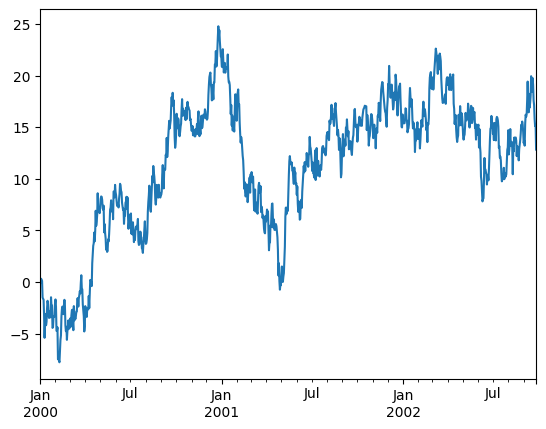

In [316]:
ts.plot()

In [317]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-0.267385,0.016804,0.390962,0.369522
2000-01-02,-1.403130,-1.182522,-0.694990,0.960194
2000-01-03,0.282508,1.166922,0.086234,1.268853
2000-01-04,0.288984,-0.640592,1.260210,-0.507553
2000-01-05,0.652168,-0.297188,-0.183185,0.115155
...,...,...,...,...
2002-09-22,0.100423,0.167808,1.693976,0.671614
2002-09-23,-0.915463,-0.735068,-0.269500,-0.055484
2002-09-24,-0.549708,-1.005833,0.444077,-0.740642
2002-09-25,-1.121648,1.959751,-0.837795,0.522658


In [318]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.267385,0.016804,0.390962,0.369522
2000-01-02,-1.670515,-1.165719,-0.304028,1.329717
2000-01-03,-1.388006,0.001204,-0.217794,2.598570
2000-01-04,-1.099022,-0.639388,1.042416,2.091017
2000-01-05,-0.446854,-0.936577,0.859231,2.206173
...,...,...,...,...
2002-09-22,36.800723,-41.551012,-20.782033,16.268747
2002-09-23,35.885260,-42.286080,-21.051534,16.213263
2002-09-24,35.335553,-43.291914,-20.607456,15.472621
2002-09-25,34.213905,-41.332163,-21.445251,15.995279


<Figure size 640x480 with 0 Axes>

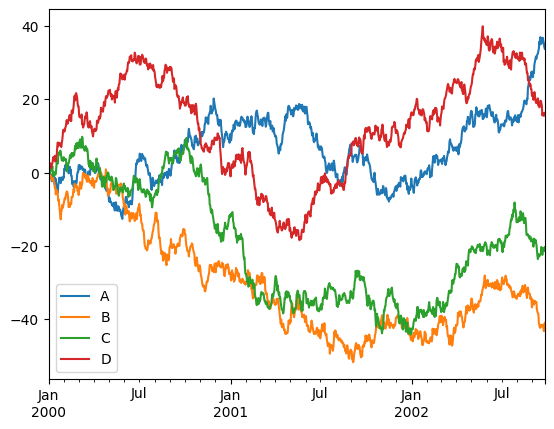

In [319]:
plt.figure() 
df.plot() 
plt.legend(loc='best')

# 100-pandas-puzzles

**https://github.com/FIIT-IAU/100-pandas-puzzles** (forked from https://github.com/ajcr/100-pandas-puzzles)
